In [2]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('new data/labeledTrainData.tsv', sep = '\t')

This data contains tweets regarding movies and it correspionding sentiment

In [5]:
data.iloc[0:5,:]

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


this data has two kinds of data, the data marked 0 are negative tweets while the data marked with  1 ispositive data

In [6]:
print(len(data))

25000


In [7]:
data.shape

(25000, 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [9]:
data.dtypes

id           object
sentiment     int64
review       object
dtype: object

In [10]:
#check if any null 
np.sum(data.isnull())

id           0
sentiment    0
review       0
dtype: int64

In [34]:
neg = np.sum(data.iloc[:,1] == 0)
pos = np.sum(data.iloc[:,1] == 1)



<BarContainer object of 2 artists>

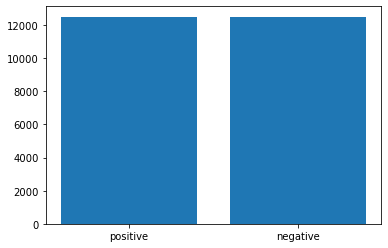

In [32]:
import matplotlib.pyplot as plt
legend = ['positive','negative']

plt.bar(legend,pos)

We have 25000 tweets, with 50% tweets beign positive and 50% beign negative

### Data pre-proccesing

In [33]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [35]:
tweets = data.iloc[:,2]

In [36]:
#sentence tokenize
sentenses = []

for i in range(len(tweets)):
    sentenses.append(nltk.sent_tokenize(tweets[i]))

In [78]:
import re
import string
semi_pros = []
for i in range(len(tweets)):
    
    #removing all the charecters exluding aphabest, like URLs, tweeter tags, puncuations.
    
    temp = re.sub('[^a-zA-Z]'," ",tweets[i])
    temp = re.sub('((www.[^s]+)|(https?://[^s]+)|(@[^s]+))',' ',tweets[i])
    temp = re.sub('[0-9]+', '', tweets[i])
    temp = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweets[i])
    temp = temp.lower()
    temp = temp.split() 
    
    semi_pros.append(temp)



In [79]:
from nltk.corpus import stopwords

In [80]:
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
#lemmatization

ps = nltk.WordNetLemmatizer()
for i in range(len(semi_pros)):
    semi_pros[i] = [ps.lemmatize(word) for word in semi_pros[i] if not word in stop_words]
    semi_pros[i] = " ".join(semi_pros[i])
    


In [66]:

semi_pros[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighty maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle message mj feeling towards press also obvious message drug bad kay br br visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fan would say made fan true really nice br br actual feature film bit finally start 20 minute excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord want mj dead bad beyond mj overheard plan nah joe pesci character ranted wanted people know supplying drug etc dunno maybe hate mj music br br lot cool thing like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually director hate 

This is the pre-proccesed data, after tokennization, Cleaning unwaned charecters, removing stopwords and lematization

In [81]:
type(semi_pros)

list

In [82]:
# tfidfVectorization 

from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(max_features = 500000)
X = cv.fit_transform(semi_pros)

In [83]:
y = data.iloc[:,1]



### Model Building

In [84]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =26105111)


In [85]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)

In [86]:
y_pred = model.predict(X_test)


In [87]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[2194,  290],
       [ 431, 2085]], dtype=int64)

From the confusion matrix, we can see that the model predict 2085 true positives and 2194 fasle negatives
only 431 false postives and 290 true negatives

In [139]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2484
           1       0.88      0.83      0.85      2516

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



we get f1 score of 0.85 and an accuracy of 86%

In [141]:
y_test

15169    1
3673     0
510      1
15860    0
12271    0
        ..
16252    0
7118     0
743      0
6478     1
21830    1
Name: sentiment, Length: 5000, dtype: int64

In [142]:
y_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

#### lets try with new tweets

In [143]:
ss = " I loved to movie so much, its awesome"
# this tweet is a positive tweet

temp = re.sub('[^a-zA-Z]'," ",ss)
temp = re.sub('((www.[^s]+)|(https?://[^s]+)|(@[^s]+))',' ',ss)
temp = re.sub('[0-9]+', '', ss)
temp = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",ss)
temp = temp.lower()
temp = temp.split()

fs = temp
fs

['i', 'loved', 'to', 'movie', 'so', 'much', 'its', 'awesome']

In [144]:

s = [ps.lemmatize(word) for word in fs if not word in stopwordlist]
s = " ".join(s)



In [145]:
l = [s]
l

['loved movie much awesome']

In [146]:

Xs = cv.transform(l)
Xs

<1x66590 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [147]:
model.predict(Xs)

array([1], dtype=int64)

As you can see, that the model has predicted that this tweet is a positive tweet, which is true

lets try on a negative tweet

In [156]:
ss = "Watched #Pushpa!! BLOCKBUSTER of a film in real sense. Larger than life, high on adrenal and full paisa Vasool. And dear @alluarjunyou are a #Rockstar!! Loved every nuance & attitude of yours. Hope to work with you soon. A big CONGRATULATIONS to the whole team! Jai Ho!Clapping hands signSmiling face with heart-shaped eyesClapping hands signRaising hands"
# this tweet is a negative tweet

temp = re.sub('[^a-zA-Z]'," ",ss)
temp = re.sub('((www.[^s]+)|(https?://[^s]+)|(@[^s]+))',' ',ss)
temp = re.sub('[0-9]+', '', ss)
temp = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",ss)
temp = temp.lower()
temp = temp.split()

fs = temp
fs

s = [ps.lemmatize(word) for word in fs if not word in stopwordlist]
s = " ".join(s)
l = [s]
l
Xs = cv.transform(l)
Xs
model.predict(Xs)

array([1], dtype=int64)

and our model has correclty recognized that this tweet is indeed negative